In [76]:
import pandas as pd
import spacy
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [77]:
# Load the data
df = pd.read_csv('../data/Emotion_final.csv')

In [78]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [79]:
# Check the distribution of emotions
emotion_distribution = df['Emotion'].value_counts()
print(emotion_distribution)

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64


In [80]:
# Load the English model
nlp = spacy.load('en_core_web_sm')

# Get the list of stopwords
stop_words = nlp.Defaults.stop_words

stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

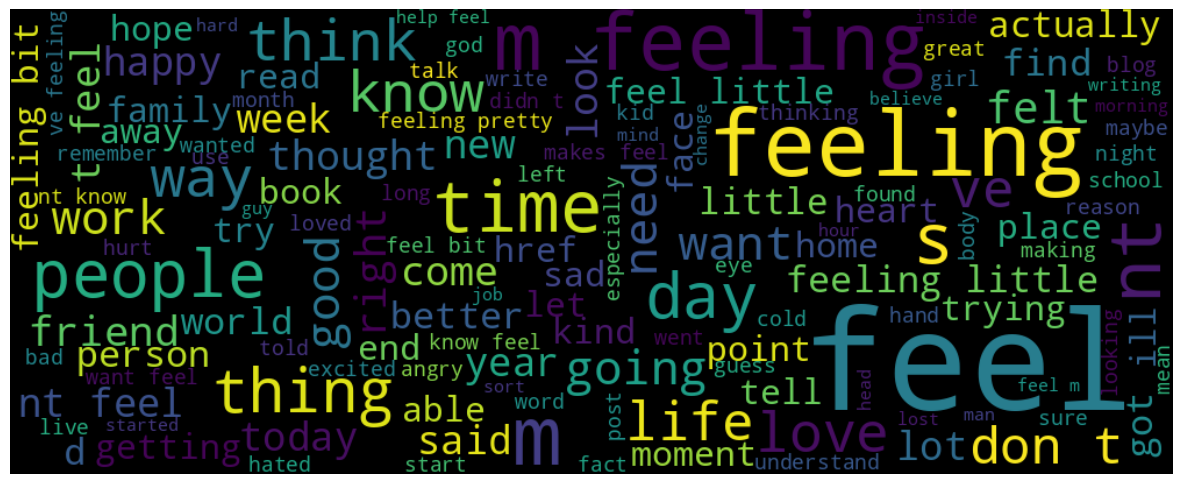

In [90]:
#finding most common words in the dataset

from wordcloud import WordCloud
import matplotlib.pyplot as plt


word= ' '.join([twts for twts in df['Text']])
clude= WordCloud(width=1000, height=400, random_state= 21,min_font_size=15,max_font_size=119).generate(word)
plt.figure(figsize = (15,15))
plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
import string

# Function to remove punctuation from a text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_punctuation)

# Add custom words to the list of stopwords
custom_stopwords = ['nt', 'm', 's', 't', 've']
stop_words = stop_words.union(custom_stopwords)

# Function to remove stopwords from a text
def remove_stopwords(text):
    # Tokenize the text
    doc = nlp(text)
    
    # Remove stopwords and return the text
    return " ".join([token.text for token in doc if not token.is_stop])

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)


In [82]:
# enregistre le fichier df dans le dossier data
df.to_csv('../data/Emotion_final_stopw.csv', index=False)

In [83]:
df_stopword = pd.read_csv('../data/Emotion_final_stopw.csv')

In [84]:
df_stopword

,Text,Emotion
0,nt feel humiliated,sadness
1,feeling hopeless damned hopeful cares awake,sadness
2,m grabbing minute post feel greedy wrong,anger
3,feeling nostalgic fireplace know property,love
4,feeling grouchy,anger
...,...,...
21454,Melissa stared friend dism,fear
21455,Successive state elections seen governing part...,fear
21456,Vincent irritated dismay,fear
21457,KendallHume turned face dismayed coup,fear


In [85]:
# Function to get most common words
def get_most_common_words(texts, num_words):
    words = [word for text in texts for word in text.split() if word not in stop_words]
    return Counter(words).most_common(num_words)

# Get the most common words for each emotion
for emotion in df_stopword['Emotion'].unique():
    texts = df_stopword[df_stopword['Emotion'] == emotion]['Text']
    print(f'{emotion}: {get_most_common_words(texts, 30)}')

sadness: [('life', 228), ('people', 226), ('bit', 220), ('things', 194), ('day', 177), ('going', 164), ('way', 162), ('don', 155), ('pretty', 146), ('right', 143), ('love', 137), ('felt', 136), ('sad', 130), ('bad', 126), ('today', 125), ('depressed', 123), ('need', 121), ('work', 121), ('good', 121), ('having', 110), ('days', 110), ('miserable', 108), ('kind', 101), ('lost', 101), ('feels', 99), ('home', 99), ('left', 99), ('look', 98), ('help', 97), ('sorry', 97)]
anger: [('people', 149), ('angry', 116), ('things', 105), ('bit', 103), ('way', 102), ('don', 93), ('offended', 92), ('resentful', 87), ('cold', 86), ('irritable', 84), ('going', 81), ('bothered', 81), ('greedy', 77), ('life', 74), ('mad', 74), ('insulted', 73), ('irritated', 72), ('need', 71), ('pissed', 71), ('violent', 70), ('annoyed', 70), ('hated', 70), ('dissatisfied', 68), ('fucked', 68), ('rude', 68), ('right', 67), ('bitchy', 67), ('cranky', 67), ('frustrated', 66), ('rushed', 66)]
love: [('love', 119), ('sweet', 8

### After cleaning the data and removing the stopwords, we identified the 30 most common words associated with each emotion in our dataset. Here are some observations:


<AxesSubplot: >

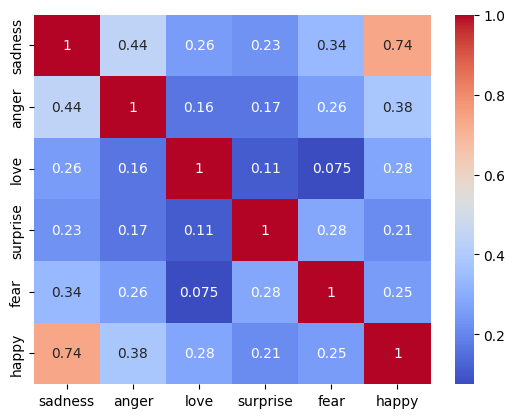

In [86]:
# Create a DataFrame with the frequencies of the most common words for each emotion
df_words = pd.DataFrame(index=df_stopword['Emotion'].unique(), columns=[word[0] for word in get_most_common_words(df_stopword['Text'], 30)])
for emotion in df_stopword['Emotion'].unique():
    texts = df_stopword[df_stopword['Emotion'] == emotion]['Text']
    common_words = get_most_common_words(texts, 30)
    for word, freq in common_words:
        df_words.loc[emotion, word] = freq

# Fill NaN values with 0
df_words.fillna(0, inplace=True)

# Calculate the cosine similarity between each pair of emotions
similarity_matrix = cosine_similarity(df_words.values)

# Create a DataFrame with the similarity matrix
df_similarity = pd.DataFrame(similarity_matrix, index=df_words.index, columns=df_words.index)

# Display the similarity matrix as a heatmap
sns.heatmap(df_similarity, annot=True, cmap='coolwarm')

In [87]:
df_similarity

,sadness,anger,love,surprise,fear,happy
sadness,1.000000,0.441994,0.255315,0.228134,0.335752,0.738692
anger,0.441994,1.000000,0.162218,0.165027,0.259412,0.383467
love,0.255315,0.162218,1.000000,0.110005,0.075033,0.279466
surprise,0.228134,0.165027,0.110005,1.000000,0.282850,0.212441
fear,0.335752,0.259412,0.075033,0.282850,1.000000,0.253037
happy,0.738692,0.383467,0.279466,0.212441,0.253037,1.000000
